### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# 1. URL 찾기

In [3]:
url = "http://corners.gmarket.co.kr/Bestsellers"

In [4]:
# 2. request > response : str(html)

In [5]:
response = requests.get(url)
response

<Response [200]>

In [6]:
# 3. bs > DataFrame

In [7]:
dom = BeautifulSoup(response.text, "html.parser")

In [8]:
# select items
elements = dom.select(".best-list")[1].select("li")
len(elements)

200

In [9]:
element = elements[0]

In [10]:
# select item data
data = {
    "title": element.select_one(".itemname").text,
    "link": element.select_one(".itemname").get("href"),
    "img": element.select_one("img").get("data-original"),
    "o_price": element.select_one(".o-price").text,
    "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
}
data

{'title': '오아로 트리벨리 파프리카 1.2kg / 15% 쿠폰가 11820원',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2313043633&ver=637804804737674633',
 'img': 'http://gdimg.gmarket.co.kr/2313043633/still/300?ver=2022021500',
 'o_price': '27,800원',
 's_price': '13,900원'}

In [11]:
# make DataFrame
datas = []
for element in elements:
    datas.append({
        "title": element.select_one(".itemname").text,
        "link": element.select_one(".itemname").get("href"),
        "img": element.select_one("img.lazy").get("data-original"),
        "o_price": element.select_one(".o-price").text,
        "s_price": element.select_one(".s-price").text.strip().split("\n")[0],
    })
df = pd.DataFrame(datas)
df.tail(2)

,title,link,img,o_price,s_price
198,[아침농산](21년산/혼합/보통) 농부의아침 쌀10kg 쿠폰가 24570원,http://item.gmarket.co.kr/Item?goodscode=48482...,http://gdimg.gmarket.co.kr/484828506/still/300...,"28,900원","28,360원"
199,[레노버]Slim3-14ALC 4GB 추가 (총8GB 한정수량),http://item.gmarket.co.kr/Item?goodscode=23554...,http://gdimg.gmarket.co.kr/2355417398/still/30...,,"30,000원"


In [12]:
df.head()

,title,link,img,o_price,s_price
0,오아로 트리벨리 파프리카 1.2kg / 15% 쿠폰가 11820원,http://item.gmarket.co.kr/Item?goodscode=23130...,http://gdimg.gmarket.co.kr/2313043633/still/30...,"27,800원","13,900원"
1,[퀘이커]퀘이커 마시는 오트밀 그레인 서리태 낱봉 20개 1박스,http://item.gmarket.co.kr/Item?goodscode=19755...,http://gdimg.gmarket.co.kr/1975599165/still/30...,"19,900원","15,900원"
2,[스타벅스]컵커피 카페라떼 200mlX10컵 X 피크닉 보냉백,http://item.gmarket.co.kr/Item?goodscode=21967...,http://gdimg.gmarket.co.kr/2196780219/still/30...,"32,400원","25,900원"
3,[제이엠더블유]지마켓베스트 JMW M5001A PLUS 헤어 드라이기,http://item.gmarket.co.kr/Item?goodscode=20129...,http://gdimg.gmarket.co.kr/2012970411/still/30...,,"76,000원"
4,공유 와이드 가죽 책상 데스크매트 1+1 800X400,http://item.gmarket.co.kr/Item?goodscode=20463...,http://gdimg.gmarket.co.kr/2046388780/still/30...,"25,800원","12,900원"


In [13]:
# 4. download image

In [14]:
# make directory
import os

if not os.path.exists("datas"):           
    os.makedirs("datas")

In [15]:
%ls

01_html.ipynb                       05_gmarket.ipynb
02_css_selector.ipynb               06_naver_article.ipynb
03_naver_relational_keywords.ipynb  __pycache__/
04_mois.ipynb                       datas/


In [16]:
img_link = df.loc[0, "img"]
print(img_link)

http://gdimg.gmarket.co.kr/2313043633/still/300?ver=2022021500


In [17]:
# download image

In [18]:
response = requests.get(img_link)
response

<Response [200]>

In [19]:
with open("datas/test.png", "wb") as file:
    file.write(response.content)

In [20]:
%ls datas

000.png   001.png   002.png   003.png   004.png   test.png


In [21]:
from PIL import Image as pil

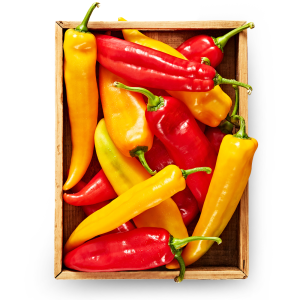

In [22]:
pil.open("datas/test.png")

In [23]:
# 5개의 아이템 이미지 다운로드
for idx, data in df[:5].iterrows():
    filename = "0" * (3 - len(str(idx))) + str(idx)
    print(idx, end=" ")
    response = requests.get(data.img)
    with open(f"datas/{filename}.png", "wb") as file:
        file.write(response.content)

0 1 2 3 4 

In [24]:
%ls datas

000.png   001.png   002.png   003.png   004.png   test.png


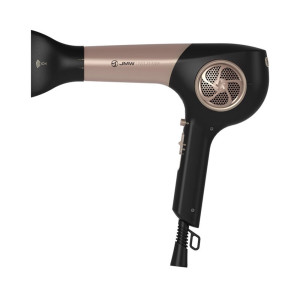

In [25]:
pil.open("datas/003.png")